<a href="https://colab.research.google.com/github/Jackmacintyre3/BlazorVersa/blob/master/UFC300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Accuracy of Winner Class

In [ ]:
import pandas as pd

csv_file_path = "large_dataset.csv"
data = pd.read_csv(csv_file_path)

winner_counts = data['winner'].value_counts(normalize=True)

baseline_accuracy = winner_counts.max() * 100

print(f"Baseline Accuracy: {baseline_accuracy:.2f}%")

Baseline Accuracy: 65.55%


# Basic Fight Statistics

In [ ]:
import pandas as pd

csv_file_path = "large_dataset.csv"

large_dataset_df = pd.read_csv(csv_file_path)

title_fights_df = large_dataset_df[large_dataset_df['is_title_bout'] == 1]

champion_retained_count = title_fights_df[title_fights_df['winner'] == 'Red']['r_fighter'].eq(title_fights_df['r_fighter']).sum()

print("Number of title fights:", len(title_fights_df))
print("Number of times the champion retained:", champion_retained_count)

method_percentages_title = title_fights_df['method'].value_counts(normalize=True) * 100

print("\nMethod of Victory Percentages in Title Fights:")
print(method_percentages_title.to_string())

average_fight_time_title_sec = title_fights_df['time_sec'].mean()
average_fight_time_title_min = average_fight_time_title_sec // 60
average_fight_time_title_sec %= 60
print("\nAverage Fight Time in Title Fights:", int(average_fight_time_title_min), "minutes", int(average_fight_time_title_sec), "seconds")

print("\n-------------------------------------------\n")

non_title_fights_df = large_dataset_df[large_dataset_df['is_title_bout'] == 0]

method_percentages_non_title = non_title_fights_df['method'].value_counts(normalize=True) * 100

print("Number of non-title fights:", len(non_title_fights_df))

print("\nMethod of Victory Percentages in Non-Title Fights:")
print(method_percentages_non_title.to_string())

average_fight_time_non_title_sec = non_title_fights_df['time_sec'].mean()
average_fight_time_non_title_min = average_fight_time_non_title_sec // 60
average_fight_time_non_title_sec %= 60
print("\nAverage Fight Time in Non-Title Fights:", int(average_fight_time_non_title_min), "minutes", int(average_fight_time_non_title_sec), "seconds")

Number of title fights: 415
Number of times the champion retained: 321

Method of Victory Percentages in Title Fights:
method
KO/TKO                     36.867470
Decision - Unanimous       31.084337
Submission                 21.686747
Decision - Split            7.228916
TKO - Doctor's Stoppage     1.927711
Decision - Majority         0.963855
DQ                          0.240964

Average Fight Time in Title Fights: 3 minutes 46 seconds

-------------------------------------------

Number of non-title fights: 7024

Method of Victory Percentages in Non-Title Fights:
method
Decision - Unanimous       36.033599
KO/TKO                     32.047267
Submission                 20.088269
Decision - Split            9.595672
TKO - Doctor's Stoppage     1.153189
Decision - Majority         0.783030
DQ                          0.298975

Average Fight Time in Non-Title Fights: 3 minutes 47 seconds


# Fighter Stances (Confusion Matrix)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

csv_file_path = "large_dataset.csv"
data = pd.read_csv(csv_file_path)

data = data[['r_stance', 'b_stance', 'winner']].dropna()

encoder = LabelEncoder()
data['r_stance'] = encoder.fit_transform(data['r_stance'])
data['b_stance'] = encoder.fit_transform(data['b_stance'])
data['winner'] = encoder.fit_transform(data['winner'])

features = data[['r_stance', 'b_stance']]
target = data['winner']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.5017337031900139
Confusion Matrix:
[[ 331 1171]
 [ 266 1116]]


# Fight Duration Analysis

In [ ]:
import pandas as pd

csv_file_path = "large_dataset.csv"
fight_data_df = pd.read_csv(csv_file_path)

total_duration_seconds = fight_data_df['time_sec'].sum()
total_duration_hours = total_duration_seconds / 3600

average_duration_seconds = fight_data_df['time_sec'].mean()
average_duration_minutes = int(average_duration_seconds // 60)
average_duration_seconds %= 60

median_duration_seconds = fight_data_df['time_sec'].median()
median_duration_minutes = int(median_duration_seconds // 60)
median_duration_seconds %= 60

duration_std_dev = fight_data_df['time_sec'].std()
duration_variance = fight_data_df['time_sec'].var()

percentile_25_seconds = fight_data_df['time_sec'].quantile(0.25)
percentile_25_minutes = int(percentile_25_seconds // 60)
percentile_25_seconds %= 60

percentile_50_seconds = fight_data_df['time_sec'].quantile(0.5)
percentile_50_minutes = int(percentile_50_seconds // 60)
percentile_50_seconds %= 60

percentile_75_seconds = fight_data_df['time_sec'].quantile(0.75)
percentile_75_minutes = int(percentile_75_seconds // 60)
percentile_75_seconds %= 60

print("Total Duration of All Fights:", f"{total_duration_hours:.2f} hours")
print("")
print("Average Fight Time:", f"{average_duration_minutes} minutes {int(average_duration_seconds)} seconds")
print("Median Fight Time:", f"{median_duration_minutes} minutes {int(median_duration_seconds)} seconds")
print("")
print("Standard Deviation of Fight Time:", f"{duration_std_dev:.2f} seconds")
print("Variance of Fight Time:", f"{duration_variance:.2f} seconds")
print("")
print("25th, 50th (Median), and 75th Percentiles of Fight Time:")
print(f"25th Percentile: {percentile_25_minutes} minutes {int(percentile_25_seconds)} seconds")
print(f"50th Percentile: {percentile_50_minutes} minutes {int(percentile_50_seconds)} seconds")
print(f"75th Percentile: {percentile_75_minutes} minutes {int(percentile_75_seconds)} seconds")


Total Duration of All Fights: 469.10 hours

Average Fight Time: 3 minutes 47 seconds
Median Fight Time: 4 minutes 47 seconds

Standard Deviation of Fight Time: 98.17 seconds
Variance of Fight Time: 9637.28 seconds

25th, 50th (Median), and 75th Percentiles of Fight Time:
25th Percentile: 2 minutes 29 seconds
50th Percentile: 4 minutes 47 seconds
75th Percentile: 5 minutes 0 seconds


# Analysing the relationship between Reach Difference and Strikes Landed Per Minute

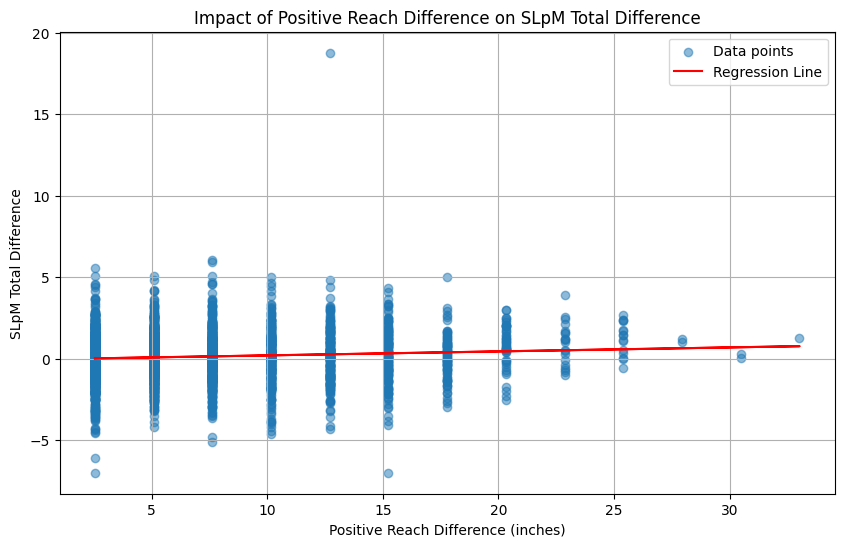

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data_path = "/content/large_dataset.csv"
data = pd.read_csv(data_path)

data_filtered = data[data['reach_diff'] > 0][['reach_diff', 'SLpM_total_diff']].dropna()

X = sm.add_constant(data_filtered['reach_diff'])

y = data_filtered['SLpM_total_diff']

model = sm.OLS(y, X)

results = model.fit()

plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['reach_diff'], data_filtered['SLpM_total_diff'], alpha=0.5, label='Data points')
plt.plot(data_filtered['reach_diff'], results.predict(X), 'r', label='Regression Line')
plt.title('Impact of Positive Reach Difference on SLpM Total Difference')
plt.xlabel('Positive Reach Difference (inches)')
plt.ylabel('SLpM Total Difference')
plt.legend()
plt.grid(True)
plt.show()

# Analysing the relationship between Wins Difference and Strikes Landed Per Minute

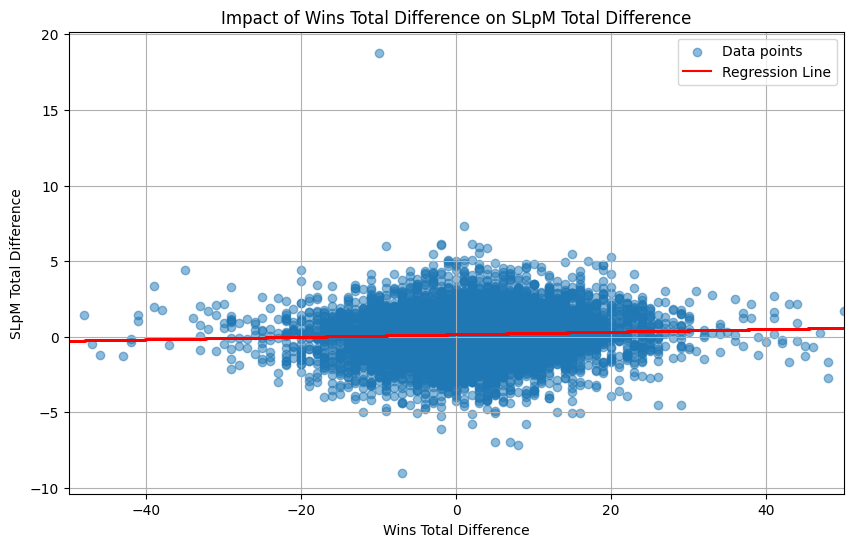

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data_path = "/content/large_dataset.csv"
data = pd.read_csv(data_path)

data['wins_total_diff'] = pd.to_numeric(data['wins_total_diff'], errors='coerce')
data['SLpM_total_diff'] = pd.to_numeric(data['SLpM_total_diff'], errors='coerce')
data_filtered = data.dropna(subset=['wins_total_diff', 'SLpM_total_diff'])

X = sm.add_constant(data_filtered['wins_total_diff'])
y = data_filtered['SLpM_total_diff']
model = sm.OLS(y, X)
results = model.fit()

plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['wins_total_diff'], data_filtered['SLpM_total_diff'], alpha=0.5, label='Data points')
predicted_values = results.predict(X)
plt.plot(data_filtered['wins_total_diff'], predicted_values, color='red', label='Regression Line')

plt.xlim(-50, 50)

plt.title('Impact of Wins Total Difference on SLpM Total Difference')
plt.xlabel('Wins Total Difference')
plt.ylabel('SLpM Total Difference')
plt.legend()
plt.grid(True)
plt.show()

# Analysing the relationship between Knockdown Difference and Strike Accuracy



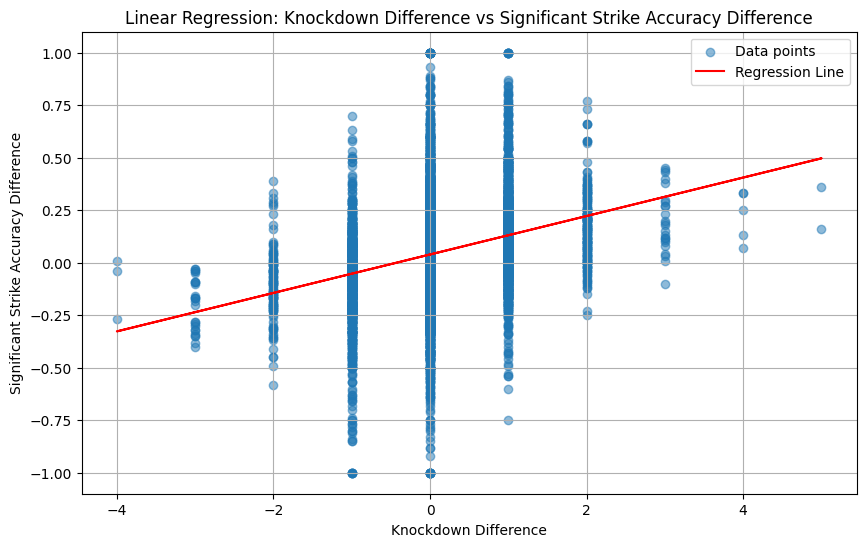

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data_path = "/content/large_dataset.csv"
data = pd.read_csv(data_path)

data['kd_diff'] = pd.to_numeric(data['kd_diff'], errors='coerce')
data['sig_str_acc_diff'] = pd.to_numeric(data['sig_str_acc_diff'], errors='coerce')
data_filtered = data.dropna(subset=['kd_diff', 'sig_str_acc_diff'])

X = sm.add_constant(data_filtered['kd_diff'])

y = data_filtered['sig_str_acc_diff']

model = sm.OLS(y, X)

results = model.fit()

summary = results.summary()

plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['kd_diff'], data_filtered['sig_str_acc_diff'], alpha=0.5, label='Data points')
predicted_values = results.predict(X)
plt.plot(data_filtered['kd_diff'], predicted_values, color='red', label='Regression Line')
plt.title('Linear Regression: Knockdown Difference vs Significant Strike Accuracy Difference')
plt.xlabel('Knockdown Difference')
plt.ylabel('Significant Strike Accuracy Difference')
plt.legend()
plt.grid(True)
plt.show()

# Naive Bayes for Significant Strike Difference and Takedown Accuracy Difference.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data_path = "/content/large_dataset.csv"
data = pd.read_csv(data_path)

data['sig_str_diff'] = pd.to_numeric(data['sig_str_diff'], errors='coerce')
data['td_acc_diff'] = pd.to_numeric(data['td_acc_diff'], errors='coerce')
data['winner'] = data['winner'].map({'Red': 1, 'Blue': 0})
data = data.dropna(subset=['sig_str_diff', 'td_acc_diff', 'winner'])

X = data[['sig_str_diff', 'td_acc_diff']]
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7907706093189965


# Naive Bayes for Win Difference, Age Difference and Control Seconds Difference.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data_path = "/content/large_dataset.csv"
data = pd.read_csv(data_path)

data['wins_total_diff'] = pd.to_numeric(data['wins_total_diff'], errors='coerce')
data['age_diff'] = pd.to_numeric(data['age_diff'], errors='coerce')
data['ctrl_sec_diff'] = pd.to_numeric(data['ctrl_sec_diff'], errors='coerce')

data['winner'] = data['winner'].map({'Red': 1, 'Blue': 0})
data = data.dropna(subset=['wins_total_diff', 'age_diff', 'ctrl_sec_diff', 'winner'])

X = data[['wins_total_diff', 'age_diff', 'ctrl_sec_diff']]
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7186346863468634
